Text(0, 0.5, 'Precio')

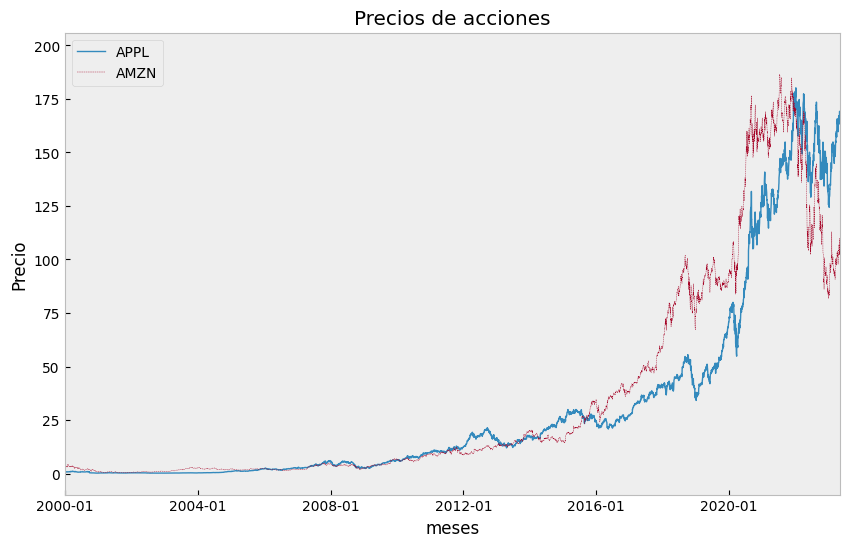

In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

mpl.style.use('bmh') #Cambio el estilo de los gráficos

url = 'Stocks_DataSet.xlsx'
df = pd.read_excel(url)

df.shape #Verifico que haya cargado bien. Como shape es un atributo, me describe el tama del data set, va sin paréntesis

df['Date'] = pd.to_datetime(df['Date'])

df['Mes'] = df.Date.dt.month

df.head()

fig, ax = plt.subplots(figsize=(10,6)) #Le doy las dimensiones del gráfico

ax.plot(df.Date, df.APPL, label = 'APPL', linewidth = 1)
ax.plot(df.Date, df.AMZN, label = 'AMZN', linewidth = 0.3, linestyle = '--')

ax.legend() #Muestro las leyendas de las acciones junto con el color de la serie
ax.grid() #Le quito la grilla al gráfico

rango_inicio = dt.date(2000,1,1) #Acoto el gráfico entre enero de 2000 y mayo de 2023
rango_fin = dt.date(2023,5,1)

plt.xlim(rango_inicio,rango_fin)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #Muestro en formato mes-año el eje x


ax.set_title('Precios de acciones')
ax.set_xlabel('meses')
ax.set_ylabel('Precio')



Puede observarse que tanto Amazón como Apple tienen una alta correlación 

Text(0, 0.5, 'Precio')

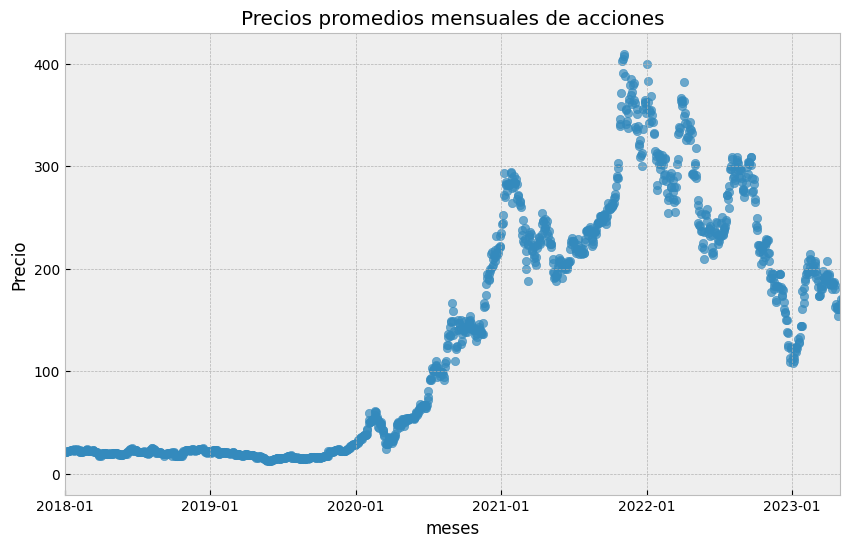

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.Date, df.TSLA, alpha = 0.7)
rango_inicio = dt.date(2018,1,1) #Acoto el gráfico entre enero de 2000 y mayo de 2023
rango_fin = dt.date(2023,5,1)

plt.xlim(rango_inicio,rango_fin)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #Muestro en formato mes-año el eje x


ax.set_title('Precios promedios mensuales de acciones')
ax.set_xlabel('meses')
ax.set_ylabel('Precio')


Observaciones: en éste caso, el gráfico de puntos no muestra un patrón que sea de ayuda para determinar el comportamiento de la variable estudiada.

C:\Users\perama\AppData\Local\Temp\ipykernel_27960\668601547.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_retornos_mensuales = df.resample('M', on = 'Date').agg({


(18993.0, 19478.0)

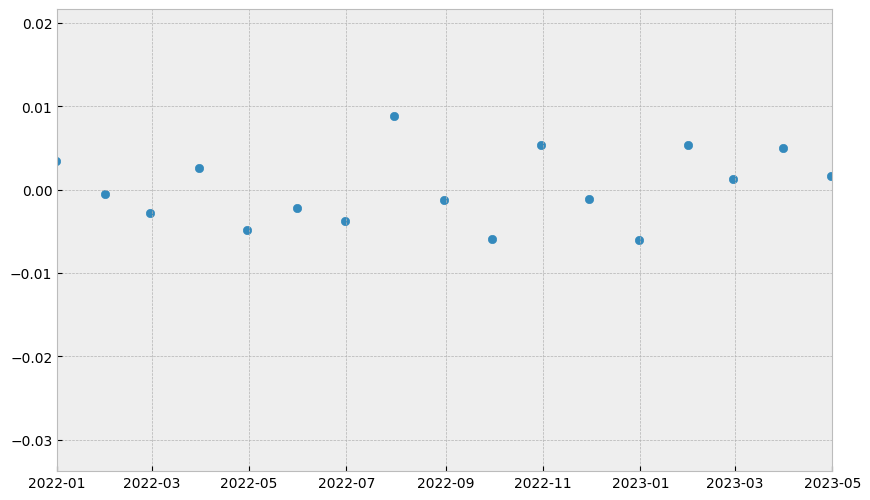

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df['Mes'] = df.Date.dt.month #Agrego una columna con el mes de cada fecha

df['Rend_APPL']=df['APPL'].pct_change() #Agrego una columna con el rendimiento mensual de cada activo
df['Rend_AMZN']=df['AMZN'].pct_change()

#Creo un nuevo data frame con los rendimientos mensuales promedios, agrupando todos los rendimientos diarios
df_retornos_mensuales = df.resample('M', on = 'Date').agg({
    'Rend_APPL':'mean',
    'Rend_AMZN':'mean'}).reset_index()

df_retornos_mensuales

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_retornos_mensuales.Date, df_retornos_mensuales.Rend_APPL)
rango_inicio = dt.date(2022,1,1) #Acoto el gráfico entre enero de y mayo de 2023
rango_fin = dt.date(2023,5,1)

plt.xlim(rango_inicio,rango_fin)



Observaciones: en éste gráfico, puede observarse que los rendimientos mensuales, expresados en porcentajes, se encuentran en un rango entre -0,01 y + 0,01, lo que indicaría que podría ser un buen momento para tomar ganancias cuando se acerca al +0,01 y comprar en el -0,01

<Axes: >

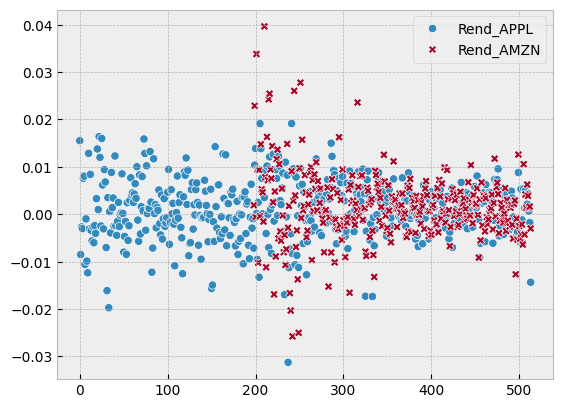

In [5]:
import seaborn as sns
sns.scatterplot(data=df_retornos_mensuales)

Observaciones: no se observa un patrón útil con éste gráfico para la comparación de APPL y AMZN

<Axes: xlabel='Date', ylabel='Rend_APPL'>

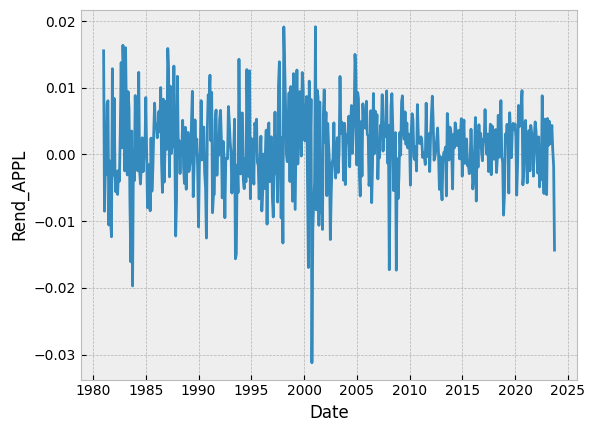

In [6]:
sns.lineplot(data=df_retornos_mensuales,x='Date', y='Rend_APPL')

Observaciones: en esta gráfica puede obsercarse también, que los rendimientos mensuales eperados para APPL desde 1980 han variado entre +0.01 y -0.01 (a excepción del año 2000 y 2001 donde la crísis de las .com afectaron las cotizaciones de todos los activos financieros)

<Axes: ylabel='Count'>

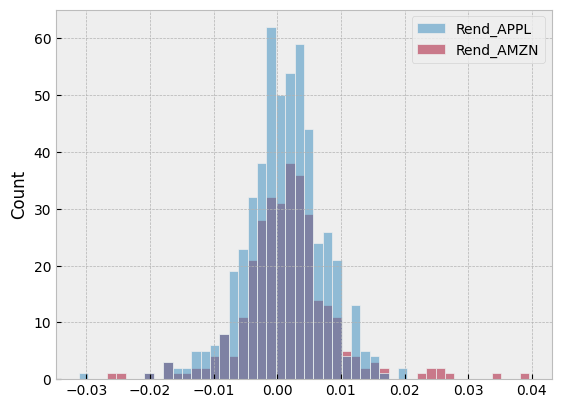

In [7]:
sns.histplot(data=df_retornos_mensuales)

Observaciones: Mediante el histograma, podemos asegurar que la mayor parte de los rendimientos mensuales de ambas acciones, tienen una distribución normal (campana de gauss)